In [1]:
# Useful starting lines
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import sys
import matplotlib.pyplot as plt
from implementations import *

# TO REMOVE ONCE IMPLEMENTED
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%load_ext autoreload
%autoreload 2

# Data input and output paths
DATA_TRAIN_PATH = '../data/train.csv' 
DATA_TEST_PATH = '../data/test.csv'
OUTPUT_PATH = 'predictions_out.csv'

# For debugging purpose
np.set_printoptions(threshold= 50)
np.random.seed(10)

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

COLUMNS_NAMES = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

## Analyse Data


### Null values

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,-1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,100002,-1,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,100003,-1,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,100004,-1,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000
mean,224999.500000,-0.314664,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591
std,72168.927986,0.949205,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662
min,100000.000000,-1.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,162499.750000,-1.000000,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000
50%,224999.500000,-1.000000,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
75%,287499.250000,1.000000,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750
max,349999.000000,1.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


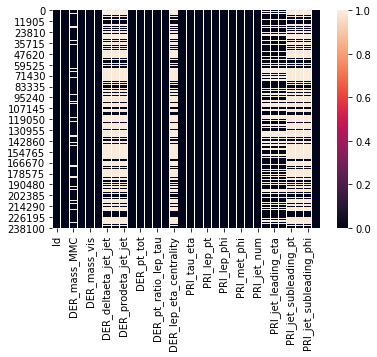

In [3]:
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
data = pd.read_csv(DATA_TRAIN_PATH, header=0, na_values='-999', delimiter=',')

indicesS = data[data['Prediction'].str.contains('s')].index
indicesB = pd.Int64Index(np.arange(len(data))).difference(indicesS)
data.loc[indicesS, 'Prediction'] = np.ones(len(indicesS))
data.loc[indicesB, 'Prediction'] = np.ones(len(indicesB))-2

sns.heatmap(data.isna())
display(data.head())
display(data.describe())


### Plot Correlation Matrix

Text(0.5, 0.98, 'Wine Attributes Correlation Heatmap')

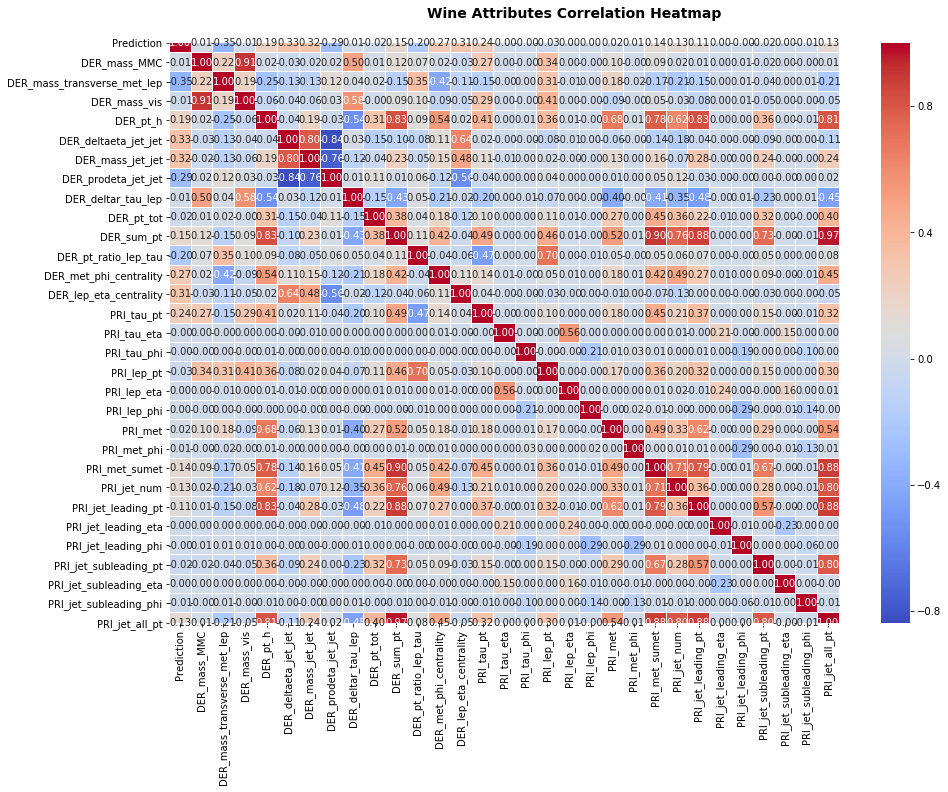

In [4]:
corr = data.drop(['Id'], axis=1).corr()
fig, (ax) = plt.subplots(1, 1, figsize=(15,10))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Wine Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')


### Outliers 

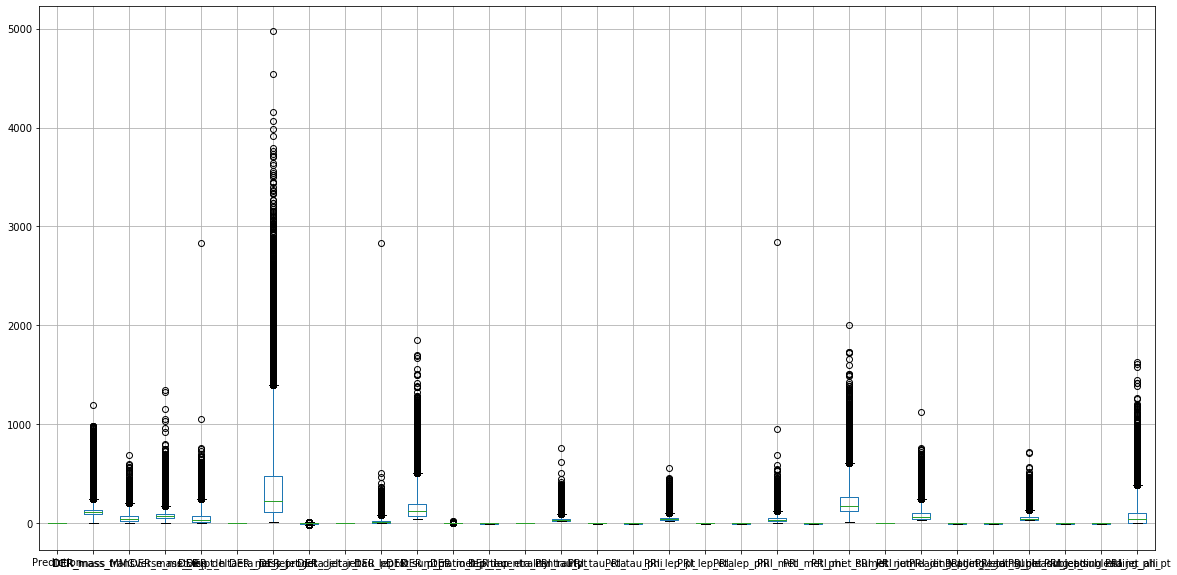

In [21]:
data[~data.isna()].drop(['Id'], axis = 1).boxplot(figsize=(20, 10), whis=2.5)

In [30]:
data[data['PRI_jet_num']==3].describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,22164.000000,22164.000000,20687.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.00000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.0,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000
mean,224679.896003,-0.392619,123.189990,42.120203,78.925522,126.066343,1.942770,327.179877,-0.153947,1.88462,53.548536,358.008310,1.580736,0.545345,0.379694,46.770938,-0.003881,-0.011762,55.916913,0.000269,0.036735,65.818764,0.007977,414.852725,3.0,123.107808,-0.013810,-0.001050,71.248456,-0.007787,-0.019144,255.320458
std,72390.704166,0.919722,70.899464,38.075038,48.790879,83.821859,1.469926,317.279844,2.867334,0.82726,32.299212,150.138383,1.247161,0.943359,0.387636,32.430840,1.204737,1.824155,32.966571,1.217684,1.818101,49.698410,1.812382,158.829033,0.0,76.313756,1.573264,1.806774,40.126329,1.775354,1.814782,128.454234
min,100005.000000,-1.000000,15.731000,0.000000,10.342000,0.777000,0.000000,17.084000,-15.347000,0.37900,0.040000,145.486000,0.081000,-1.414000,0.000000,20.001000,-2.496000,-3.141000,26.001000,-2.485000,-3.142000,0.208000,-3.141000,22.710000,3.0,31.266000,-4.439000,-3.141000,30.235000,-4.491000,-3.142000,92.812000
25%,161858.000000,-1.000000,88.888000,13.425750,54.037250,65.497750,0.714000,123.789750,-1.345250,1.23000,33.208250,254.996500,0.782000,0.015000,0.000000,26.290000,-0.919000,-1.592000,34.218000,-0.929250,-1.523250,32.054250,-1.548000,306.536250,3.0,71.515250,-1.179250,-1.559000,46.006750,-1.326000,-1.593250,167.900500
50%,224412.500000,-1.000000,107.534000,32.165000,67.991000,108.909000,1.634500,221.334500,-0.015000,1.76700,45.694500,320.584000,1.261000,0.966000,0.235000,36.110500,-0.005000,-0.028500,45.682500,0.011000,0.065000,53.249500,0.009000,382.921500,3.0,101.681500,-0.022500,-0.018000,59.799500,0.000000,-0.041000,222.157500
75%,287699.750000,1.000000,132.362000,62.188000,87.763250,166.420250,2.877000,411.927000,1.119250,2.49100,66.121250,417.148750,1.984000,1.320000,0.785250,55.253000,0.911000,1.575000,65.944500,0.933000,1.605000,85.100750,1.562250,486.144500,3.0,150.187250,1.163250,1.578000,82.940750,1.326000,1.548000,304.904000
max,349993.000000,1.000000,988.199000,690.075000,1329.913000,762.806000,7.877000,4062.147000,14.772000,5.50500,466.525000,1852.462000,19.672000,1.414000,1.000000,449.648000,2.497000,3.141000,461.896000,2.497000,3.140000,695.533000,3.141000,2003.976000,3.0,760.846000,4.476000,3.141000,721.456000,4.500000,3.141000,1633.433000


## Clean the data

In [84]:
def outliers_iqr(tX, whos = 2.5):   
    for i, column in enumerate(tX.T):
        # Compute lower and upper bounds depending on the 1st and 3st quartile
        quartile_1, quartile_3 = np.nanpercentile(column, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * whos)
        upper_bound = quartile_3 + (iqr * whos)
        
        # Increase small outliers
        indices = np.where(column < lower_bound)
        tX[indices, i] = lower_bound
        
        # Decrease big outliers
        indices = np.where(column > upper_bound)
        tX[indices, i] = upper_bound
        
    return tX

def infereMissingValues(tX, col):
    #print("col: ", col)
    # Regression parameters
    
    max_iters = 500
    gamma = 0.001
    lambda_ = 0.01
    degree = 3
    
    # Get all rows where DER_Mass_MMC is undefined and respectively defined
    train = tX[~np.isnan(tX[:, col]), :]
    test = tX[np.isnan(tX[:, col]), :]  
    
    # Create the training and testing sets
    tx_0_train = np.delete(train, col, axis=1)
    tx_0_train = tx_0_train[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    ty_0_train = train[:, col]
    tx_0_test =  np.delete(test, col, axis=1)
    tx_0_test = tx_0_test[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    
    # Expande the dimension with polynomial
    tx_0_train = build_poly(tx_0_train, degree)
    tx_0_test =build_poly(tx_0_test, degree)
    
    initial_w = np.zeros(tx_0_train.shape[1])
    # Train the model
    loss, weights = ridge_regression(ty_0_train, tx_0_train, lambda_)
    #loss, weights = least_squares_GD(ty_0_train, tx_0_train, initial_w, max_iters, gamma)
    #loss, weights = least_squares(ty_0_train, tx_0_train)
    # Predict the undefined values
    tx_0_test = np.dot(tx_0_test, weights)
    tX[np.isnan(tX[:, col]), col]  = tx_0_test
    print("Loss: ", loss)  
    return tX

def pri_jet_split(y, tX, ids):
    # Get the rows' indexes of each category
    indices_cat_0 = np.argwhere(tX[:, 22] == 0).flatten()
    indices_cat_1 = np.argwhere(tX[:, 22] == 1).flatten()
    indices_cat_2 = np.argwhere(tX[:, 22] == 2).flatten()
    indices_cat_3 = np.argwhere(tX[:, 22] == 3).flatten()

    # Split the dataset in 4
    tXC = [tX[indices_cat_0, :], tX[indices_cat_1, :], tX[indices_cat_2, :], tX[indices_cat_3, :]]
    idsC = [ids[indices_cat_0], ids[indices_cat_1], ids[indices_cat_2], ids[indices_cat_3]]
    yC = [y[indices_cat_0], y[indices_cat_1], y[indices_cat_2], y[indices_cat_3]]
    
    # Delete undefined features for each category, cf. features description : http://opendata.cern.ch/record/328
    # And the PRI_jet_num feature which is constant now
    tXC[0] = np.delete(tXC[0], (4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29), 1)
    tXC[1] = np.delete(tXC[1], (4, 5, 6, 12, 22, 26, 27, 28), 1)
    tXC[2] = np.delete(tXC[2], (22), 1)
    tXC[3] = np.delete(tXC[3], (22), 1)
    
    return yC, tXC, idsC

def prepareData(y, tX, ids):
    # Replace -999 by nan
    tX[tX==-999]=np.nan
    
    # Cap our outliers records.
    tX = outliers_iqr(tX)
      
    # Split the data into 4 differents class, depending on PRI_jet_num value
    yC, tXC, idsC = pri_jet_split(y, tX, ids)
    
    # Drop uncorreled features
    #tX = np.delete(tX, (0, 2, 7, 8, 14, 15, 16, 17, 18, 19, 20, 24, 25, 27, 28), 1)
    #np.corrcoef(x, y)
    
    
    for i in range(len(tXC)):
        # Standardize the data
        tXC[i], _, _ = standardize(tXC[i])
        # Infere missing values on each column (normally just DER_Mass_MMC)     
        colsWithNan = np.unique(np.where(np.isnan(tXC[i]))[1])
        for col in colsWithNan:
            tXC[i] = infereMissingValues(tXC[i], col)
        
        # Build polynomial extension
        tXC[i] = build_poly(tXC[i], 13)
        
    return yC, tXC, idsC

clean_yC, clean_tX, clean_ids = prepareData(y, tX, ids)

Loss:  0.029042294453335133
Loss:  0.03142717484550267
Loss:  0.036041493854561624
Loss:  0.03225699119398734


## Split the data into, training, validation and test sets

In [ ]:

# How much annotated data for training and validation. The rest is used for testing.
training_perc, validation_perc = 0.4, 0.1

indices = np.arange(len(y))
np.random.shuffle(indices)

splits = (np.array([training_perc, validation_perc]) * len(y)).astype(int).cumsum()
training_indices, validation_indices, test_indices = np.split(indices, splits)

tX_train = clean_tX[training_indices]
y_train = y[training_indices]
ids_train = ids[training_indices]

tX_validation = clean_tX[validation_indices]
y_validation = y[validation_indices]
ids_validation = ids[validation_indices]

tX_test = clean_tX[test_indices]
y_test = y[test_indices]
ids_test = ids[test_indices]

## Parameter Exploration

In [ ]:
initial_w = np.zeros(clean_tX.shape[1])
#initial_w = np.random.normal(0, 0.1, [tX.shape[1],])
max_iters = 3000
gamma = 0.01
lambda_ = 0.01
degree = 3
print(tX_train.shape)


#logmodel = LogisticRegression()
#logmodel.fit(tX_train,y_train)
#weights = logmodel.coef_



#loss, weights_1 = least_squares_GD(y_train, tX_train, initial_w, max_iters, gamma)
#loss, weights_2 = least_squares_SGD(y_train, tX_train, initial_w, max_iters, gamma)
loss, weights_3 = least_squares(y_train, tX_train)
#loss, weights_4 = ridge_regression(y_train, tX_train, lambda_)
#loss, weights_5 = logistic_regression(y_train, tX_train, initial_w, max_iters, gamma)
#loss, weights_6 = reg_logistic_regression(y_train, tX_train, lambda_, initial_w, max_iters, gamma)


#predictions = logmodel.predict(tX_test)

predictions = predict_labels(weights.T, tX_test)
#predictions_1 = predict_labels(weights_1, tX_test)
#predictions_2 = predict_labels(weights_2, tX_test)
predictions_3 = predict_labels(weights_3, tX_test)
#predictions_4 = predict_labels(weights_4, tX_test)
#predictions_5 = predict_labels(weights_5, tX_test)
#predictions_6 = predict_labels(weights_6, tX_test)

#print("", classification_report(y_test,predictions))
#print(classification_report(y_test,predictions_1))
#print(classification_report(y_test,predictions_2))
print(classification_report(y_test,predictions_3))
#print(classification_report(y_test,predictions_4))
#print(classification_report(y_test,predictions_5))
#print(classification_report(y_test,predictions_6))
#print("Loss: ", loss)


## Regression 

In [62]:
#initial_w = np.zeros(clean_tX.shape[1])
max_iters = 3000
gamma = 0.01
lambda_ = 0.0001

loss_0, weights_0 = ridge_regression(clean_yC[0], clean_tX[0], lambda_)
loss_1, weights_1 = ridge_regression(clean_yC[1], clean_tX[1], lambda_)
loss_2, weights_2 = ridge_regression(clean_yC[2], clean_tX[2], lambda_)
loss_3, weights_3 = ridge_regression(clean_yC[3], clean_tX[3], lambda_)

#loss, weights = least_squares(y, clean_tX)
#loss, weights = ridge_regression(y, clean_tX, lambda_)
predictions_0 = predict_labels(weights_0, clean_tX[0])
predictions_1 = predict_labels(weights_1, clean_tX[1])
predictions_2 = predict_labels(weights_2, clean_tX[2])
predictions_3 = predict_labels(weights_3, clean_tX[3])

print("", classification_report(clean_yC[0],predictions_0))
print("", classification_report(clean_yC[1],predictions_1))
print("", classification_report(clean_yC[2],predictions_2))
print("", classification_report(clean_yC[3],predictions_3))

               precision    recall  f1-score   support

        -1.0       0.87      0.93      0.90     74421
         1.0       0.75      0.59      0.66     25492

    accuracy                           0.85     99913
   macro avg       0.81      0.76      0.78     99913
weighted avg       0.84      0.85      0.84     99913

               precision    recall  f1-score   support

        -1.0       0.84      0.87      0.85     49834
         1.0       0.75      0.70      0.72     27710

    accuracy                           0.81     77544
   macro avg       0.79      0.78      0.79     77544
weighted avg       0.81      0.81      0.81     77544

               precision    recall  f1-score   support

        -1.0       0.85      0.81      0.83     24645
         1.0       0.83      0.86      0.84     25734

    accuracy                           0.84     50379
   macro avg       0.84      0.84      0.84     50379
weighted avg       0.84      0.84      0.84     50379

               p

## Generate predictions and save ouput in csv format for submission:

In [76]:
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [85]:
test_yC, test_tX, test_ids = prepareData(y_test, tX_test, ids_test)

Loss:  0.029043179768000537
Loss:  0.03208535480449425
Loss:  0.03544117052557686
Loss:  0.03188239279640748


In [86]:
y_pred_0 = predict_labels(weights_0, test_tX[0])
y_pred_1 = predict_labels(weights_1, test_tX[1])
y_pred_2 = predict_labels(weights_2, test_tX[2])
y_pred_3 = predict_labels(weights_3, test_tX[3])
y_pred = np.concatenate([y_pred_0, y_pred_1, y_pred_2, y_pred_3])
test_ids = np.concatenate([test_ids[0], test_ids[1], test_ids[2], test_ids[3]])

In [93]:
create_csv_submission(test_ids, y_pred, OUTPUT_PATH)
